In [286]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [287]:
#https://arxiv.org/pdf/1101.3281.pdf

In [288]:
def generate_binary_list(N, fixed_length=None):
    a_test = range(2**N)
    binary_list = []
    # Determine the fixed length if not provided
    if fixed_length is None:
        fixed_length = len(bin(max(a_test))) - 2
    for num in a_test:
        binary_representation = bin(num)[2:]  # Convert to binary and remove the '0b' prefix
        binary_digits = [int(digit) for digit in binary_representation]
        while len(binary_digits) < fixed_length:
            binary_digits.insert(0, 0)
        binary_digits.reverse()
        binary_list.append(binary_digits)

    return a_test, binary_list

a_test, a_bin = generate_binary_list(3)

print("a_test:", list(a_test))
print("a_bin:", a_bin)

a_test: [0, 1, 2, 3, 4, 5, 6, 7]
a_bin: [[0, 0, 0], [1, 0, 0], [0, 1, 0], [1, 1, 0], [0, 0, 1], [1, 0, 1], [0, 1, 1], [1, 1, 1]]


In [289]:
def flip(a, i, j):
    f = 2**i + 2**j
    return a^f

def generate_Hamiltonian(N):
    a, a_binary = generate_binary_list(N)
    a = list(a)
    H = np.zeros((2**N, 2**N))
    for a_bin, a_int in zip(a_binary, a):
        for i in range(N):
            j = (i+1)%N
            if a_bin[i] == a_bin[j]:
                H[a_int,a_int] += 1/4
            else:
                H[a_int,a_int] -= 1/4
                b = flip(a_int, i, j)
                H[a_int, b] = 1/2
    return H

H_2 = generate_Hamiltonian(2)
#Todo: Why for N=7 imaginary?Numerical error

print(H_2)

[[ 0.5  0.   0.   0. ]
 [ 0.  -0.5  0.5  0. ]
 [ 0.   0.5 -0.5  0. ]
 [ 0.   0.   0.   0.5]]


In [290]:
eigs_2 = np.linalg.eig(H_2)
eigs_2.eigenvalues

array([ 1.11022302e-16, -1.00000000e+00,  5.00000000e-01,  5.00000000e-01])

In [291]:
np.transpose(eigs_2.eigenvectors) #Todo: Need to transpose?

array([[ 0.        ,  0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [292]:
eigenvalues = []
eigenvectors = []
list_N = np.arange(2,7)

for n in list_N:
    H_n = generate_Hamiltonian(n)
    eigs = np.linalg.eig(H_n)
    eigvals = eigs.eigenvalues
    eigvecs = np.transpose(eigs.eigenvectors)
    eigenvalues.append(eigvals)
    eigenvectors.append(eigvecs)

[np.min(e) for e in eigenvalues]

[-0.9999999999999999,
 -0.75,
 -1.9999999999999987,
 -1.8680339887499,
 (-2.8027756377319992+0j)]

In [293]:
for n in list_N:
    print(f"n = {n}:")
    print(eigenvectors[n-2][np.argmin(eigenvalues[n-2])])

n = 2:
[ 0.          0.70710678 -0.70710678  0.        ]
n = 3:
[ 0.          0.          0.          0.40824829  0.          0.40824829
 -0.81649658  0.        ]
n = 4:
[ 0.00000000e+00  2.77354685e-17  2.57913478e-17  2.88675135e-01
 -8.55761944e-17 -5.77350269e-01  2.88675135e-01  5.93181067e-17
  4.45654388e-17  2.88675135e-01 -5.77350269e-01  4.86828725e-33
  2.88675135e-01 -5.93181067e-17  4.86828725e-33  0.00000000e+00]
n = 5:
[ 0.00000000e+00  1.00607891e-16 -9.37588118e-17 -2.25301316e-01
  8.22872906e-17  4.57243147e-01 -5.72904897e-02  2.87191878e-12
  3.68069548e-17 -1.49988449e-01 -2.14556738e-01 -6.48222379e-12
  1.89893846e-01  2.96975423e-12  6.40566639e-13 -2.77218716e-17
  3.05548646e-17 -8.19533814e-02  4.97148544e-01  1.13468151e-12
 -5.89846503e-01  1.67624977e-12 -5.68277868e-12 -3.47167794e-18
  1.74651341e-01 -2.17032895e-12  7.51783158e-12 -2.82752094e-18
 -2.47571470e-12  2.18275281e-17  4.43718334e-33  0.00000000e+00]
n = 6:
[ 0.00000000e+00+0.j  1.11022302e-

In [294]:
eigenvectors[0][1]

array([ 0.        ,  0.70710678, -0.70710678,  0.        ])

# Part b

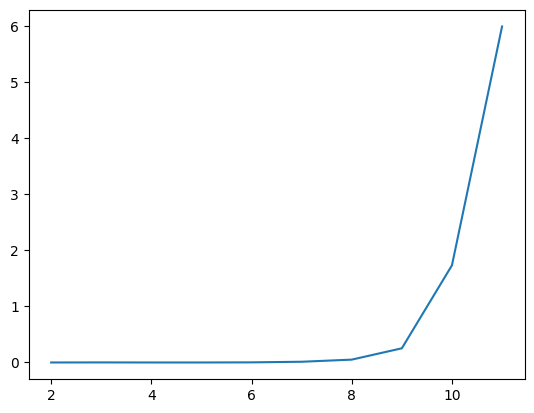

In [295]:
computing_times = []
list_N = np.arange(2,12)

for n in list_N:
    start = time.time()
    H_n = generate_Hamiltonian(n)
    eigs = np.linalg.eig(H_n)
    stop = time.time()
    diff_time = stop - start
    computing_times.append(diff_time)

plt.plot(list_N, computing_times)

In [296]:
computing_times

[0.0,
 0.0009982585906982422,
 0.0,
 0.0,
 0.0019936561584472656,
 0.01296544075012207,
 0.05086636543273926,
 0.2527153491973877,
 1.731370210647583,
 5.987319707870483]

Part c)

In [297]:
k_B = 1#.38 *10**(-23)

def magnetisation_per_particle(spin_sequence):
    m = 0
    for s in spin_sequence:
        if s == 1:
            m += 1
        elif s == -1:
            m -= 1
        elif s == 0:
            m -= 1
        else:
            print("Spin sequence is neither binary nor sequence of 1 and -1")
    return m/len(spin_sequence)

def magnetisation_for_state(state, N):
    list_a_int, list_a_bin = generate_binary_list(N)
    list_m = [] #Magnetisation per particle for all basis states
    for lb in list_a_bin:
        mp = magnetisation_per_particle(lb)
        list_m.append(mp)
    m = 0
    for index, val in enumerate(state):
        m += list_m[index] * val**2 #Todo: quadrat oder nicht?
    return m

def specific_heat(energies, N, T):
    prefs = [np.exp(-e/T) for e in energies]
    mean_energy = np.average(energies, weights=prefs)
    mean_square_energy = np.average([e_i**2 for e_i in energies], weights=prefs)
    return (mean_square_energy - mean_energy**2)/(N*k_B*T**2)

def magnetic_susceptibility(arr_states, N, T):
    #k_b = 1.38 *10**(-23)
    m_states = []
    for state in arr_states:
        m_s = magnetisation_for_state(state, N)
        m_states.append(m_s)
    m_mean = np.mean(m_states)
    m_2_mean = np.mean([m**2 for m in m_states])
    return (1/T)*(m_2_mean-m_mean**2)

def C_v(N, T, J=1):
    frac = J/(k_B*T)
    enum = frac**2
    denom = np.cosh(frac)**2
    return N*k_B*enum/denom

In [298]:
ms = magnetic_susceptibility(eigenvectors[0], 2, 1)
ms

0.5

In [299]:
[bin(a) for a in range(8)]
for b in bin(7):
    print(b)

0
b
1
1
1


In [300]:
list_N_c = [4,8]#,12] #Todo: Add another
specific_heats = []
magnetic_susceptibilities = []
list_T = np.linspace(0.1,2,100)

for n in list_N_c:
    list_sp = []
    list_ms = []
    for temp in list_T:
        H_n = generate_Hamiltonian(n)
        eigs = np.linalg.eig(H_n)
        eigvecs = eigs.eigenvectors
        sp = specific_heat(eigs.eigenvalues, n, temp)
        list_sp.append(sp)
        ms = magnetic_susceptibility(eigvecs, n, temp)
        list_ms.append(ms)
    magnetic_susceptibilities.append(list_ms)
    specific_heats.append(list_sp)

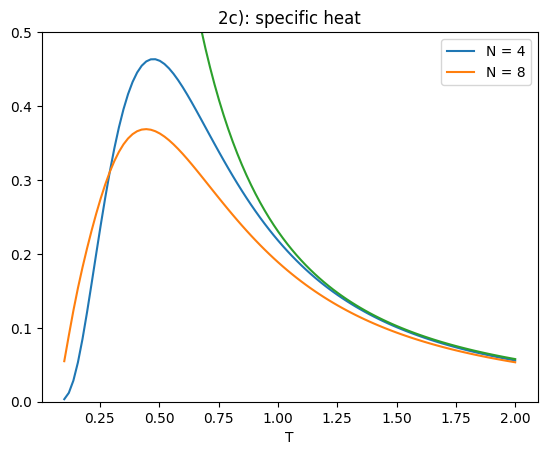

In [301]:
plt.plot(list_T, specific_heats[0], label="N = 4")
plt.plot(list_T, specific_heats[1], label="N = 8")
#plt.plot(list_T, specific_heats[2], label="N = 12") #Todo: Calculate and plot this as well
plt.plot(list_T, [3/(13*t**2) for t in list_T])
plt.title("2c): specific heat")
plt.xlabel("T")
plt.ylim(0,0.5)
plt.legend()

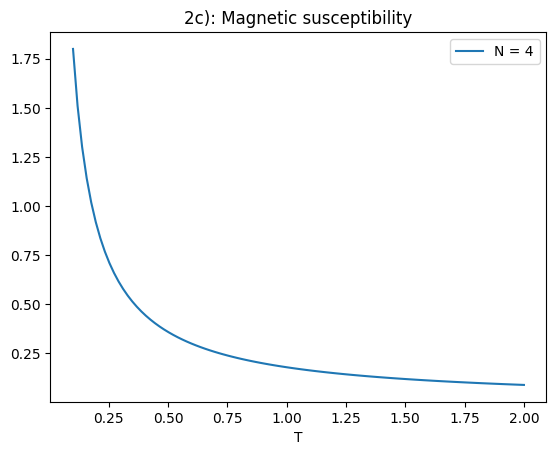

In [302]:
plt.plot(list_T, magnetic_susceptibilities[0], label="N = 4")
#plt.plot(list_T, magnetic_susceptibilities[1], label="N = 8")
#plt.plot(list_T, specific_heats[2], label="N = 12") #Todo: Calculate and plot this as well
#plt.plot(list_T, [3/(13*t**2) for t in list_T])
plt.title("2c): Magnetic susceptibility")
plt.xlabel("T")
#plt.ylim(0,0.5)
plt.legend()

In [303]:
magnetic_susceptibilities

[[1.800202630749392,
  1.510339495289744,
  1.3008763536072248,
  1.1424362848986525,
  1.0184003453953703,
  0.9186601053824217,
  0.8367138987990131,
  0.7681899157077147,
  0.7100400814509554,
  0.6600742979414437,
  0.6166784098414871,
  0.5786365598837331,
  0.5450154753644948,
  0.5150868798965023,
  0.4882741382032598,
  0.46411474074007764,
  0.44223340060593,
  0.42232241811419385,
  0.404127121188639,
  0.3874349140091083,
  0.37206693203379915,
  0.35787160731765016,
  0.3447196526966921,
  0.3325001127690108,
  0.32111722602556725,
  0.31048791018151534,
  0.3005397309345528,
  0.2912092490918134,
  0.2824406663140885,
  0.2741847083756766,
  0.2663976987207621,
  0.2590407855293456,
  0.25207929341469565,
  0.24548217692037164,
  0.2392215576432078,
  0.23327233042433218,
  0.2276118268763599,
  0.2222195267383913,
  0.21707680931082804,
  0.21216673862403546,
  0.20747387711779952,
  0.20298412351274464,
  0.1986845712867222,
  0.19456338476439936,
  0.19060969031464153,


In [304]:
# Problem 3

